In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import pandas as pd

In [95]:
#iris = datasets.load_iris()
#features = iris.data
#target = iris.target
#type(features)

In [96]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
target = df['Outcome']
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [98]:
features = df.drop("Outcome",axis=1)
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [99]:
randomforest = RandomForestClassifier(random_state=0,n_jobs=-1)


In [100]:
model = randomforest.fit(features,target)

In [101]:
#importance = model.feature_importances_
feature_scores = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)

feature_scores

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

In [102]:
feature_scores.index

Index(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure',
       'Pregnancies', 'SkinThickness', 'Insulin'],
      dtype='object')

In [103]:
importance = model.feature_importances_
importance_df = pd.DataFrame(importance, index=features.columns, 
                      columns=["Importance"])
importance_df

,Importance
Pregnancies,0.086774
Glucose,0.242098
BloodPressure,0.092903
SkinThickness,0.073109
Insulin,0.068999
BMI,0.172574
DiabetesPedigreeFunction,0.128324
Age,0.135220


In [104]:
importance_df.sort_values('Importance',ascending=False)
#importance_df.shape
importance_df

,Importance
Pregnancies,0.086774
Glucose,0.242098
BloodPressure,0.092903
SkinThickness,0.073109
Insulin,0.068999
BMI,0.172574
DiabetesPedigreeFunction,0.128324
Age,0.135220


In [105]:
type(importance_df)

pandas.core.frame.DataFrame

In [106]:
##indices = np.argsort(importance)[::-1]
# Creating a seaborn bar plot
#import seaborn as sns
#f, ax = plt.subplots(figsize=(30, 24))
#ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
#ax.set_title("Visualize feature scores of the features")
#ax.set_yticklabels(feature_scores.index)
#ax.set_xlabel("Feature importance score")
#ax.set_ylabel("Features")
#plt.show()

In [107]:
#names = [df.feature_names[i] for i in indices]

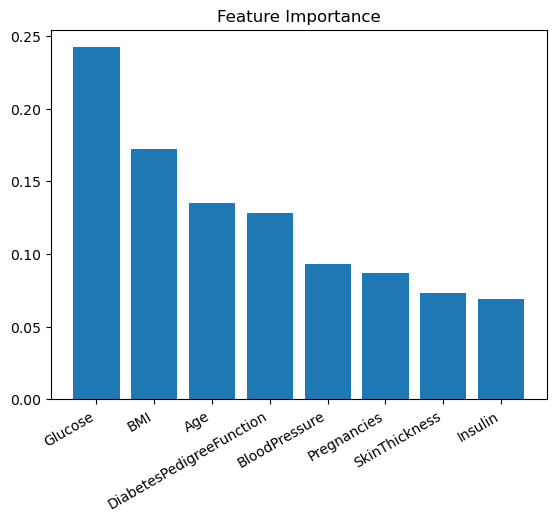

In [108]:
plt.figure()
plt.title("Feature Importance")
#plt.bar((feature_scores),feature_scores.index)
plt.xticks(rotation=30, ha='right')
plt.bar(feature_scores.index,feature_scores)
#plt.xticks(range(8),names)
plt.show()